## Michael Madden, Jan 2023
Simple Python routine to read and plot a small dataset.

In [1]:
# Package imports
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
%matplotlib inline

In [2]:
# Use pandas to read the CSV file as a dataframe
df = pd.read_csv("moons500.csv")

# The y values are those labelled 'Class': extract their values
y = df['Class'].values

# The x values are all other columns
del df['Class']   # drop the 'Class' column from the dataframe
X = df.values     # convert the remaining columns to a numpy array


In [3]:
# Some examples of working with the data, to look at rows/columns
print ("len(X):", len(X))            # outer array: one per sample
print ("len(X[0]):", len(X[0]))      # each inner array is the attributes of one sample
print ("len(X[:,0]):", len(X[:,0]))  # select column 0 from array

# np.shape returns all dimensions of the array
(nsamples, nattribs) = np.shape(X)
print ("X: nsamples =", nsamples, ", nattribs =", nattribs)

# Now example the y vector (1D array)
print ("len(y)", len(y))
print ("np.shape(y):", np.shape(y))

# You can transpose the y data using 'reshape'
yt = np.reshape(y, (len(y),1))  
print ("np.shape(yt):", np.shape(yt))
(nsamples, nattribs) = np.shape(yt)
print ("y transpose: nsamples =", nsamples, ", nattribs =", nattribs)

len(X): 500
len(X[0]): 2
len(X[:,0]): 500
X: nsamples = 500 , nattribs = 2
len(y) 500
np.shape(y): (500,)
np.shape(yt): (500, 1)
y transpose: nsamples = 500 , nattribs = 1


In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))


class LogisticRegression:
    def __init__(self, max_iter, alpha, threshold):
        self.max_iter = max_iter
        self.alpha = alpha
        self.threshold = threshold
        self.weight = None
        self.bias = None
        
    def fit(self, X, y):
        self.weight = np.random.randn(np.shape(X)[1])
        self.bias = np.random.randn(1)
        for _ in range(self.max_iter):
            pred = sigmoid(np.dot(X, self.weight) + self.bias)
            dw = (1/np.shape(X)[0])*np.dot(X.T, (pred-y))
            db = (1/np.shape(X)[0])*np.sum(pred-y)

            self.weight = self.weight - self.alpha*dw
            self.bias = self.bias - self.alpha*db
        
    def predict(self, X):
        pred = sigmoid(np.dot(X, self.weight) + self.bias)
        return pred

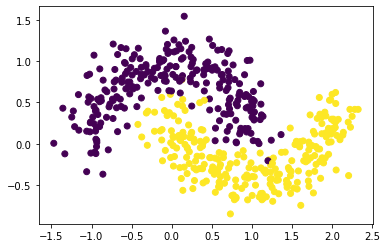

In [5]:
# plot X[0] vs X[1] and colour points according to the class, y
plt.scatter(X[:,0], X[:,1], c=y)  

In [6]:
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
model = LogisticRegression(1000, 0.1, 100)

In [8]:
model.fit(X_train, Y_train)

In [9]:
pred = model.predict(x_test)

In [10]:
fpr, tpr, _ = roc_curve(y_test, pred)

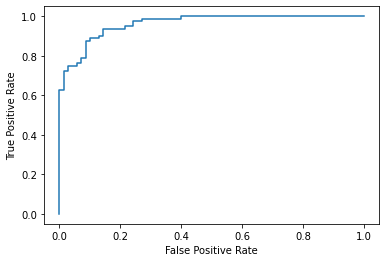

In [11]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [12]:
pred = [1 if p >= 0.4 else 0 for p in pred]

def accuracy_score(Y_test, Y_pred):
    return np.sum(Y_test == Y_pred)/len(Y_test)

accuracy_score(y_test, pred)

0.88